# Train

In [1]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

from data_loaders import Plain_Dataset, eval_data_dataloader
from deep_emotion import Deep_Emotion
from generate_data import Generate_data

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
epochs = 100
lr = 0.005
batchsize = 128

net = Deep_Emotion()
net.to(device)
print("Model archticture: ", net)
traincsv_file = 'data' +'/'+'train.csv'
validationcsv_file = 'data'+'/'+'val.csv'
train_img_dir = 'data'+'/'+'train/'
validation_img_dir = 'data'+'/'+'val/'

transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= lr)
Train(epochs, train_loader, val_loader, criterion, optmizer, device)


Model archticture:  Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=2, bias=True)
  (localization): Sequential(
    (0): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


FileNotFoundError: [Errno 2] No such file or directory: 'data/train.csv'

In [48]:
torch.save(net.state_dict(), 'deepEmotion.pt')

# Test

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Deep_Emotion()
net.load_state_dict(torch.load('deepEmotion.pt'))
net.to(device)

Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=7, bias=True)
  (localization): Sequential(
    (0): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplac

In [50]:
import cv2
import matplotlib.pyplot as plt

In [51]:
frame = cv2.imread('happy.jpg')

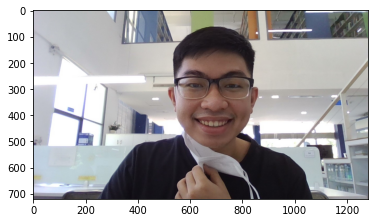

In [52]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [53]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [54]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [55]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face is not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

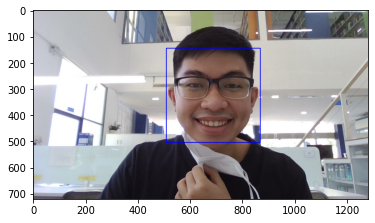

In [56]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

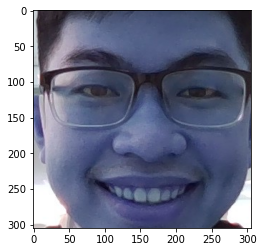

In [57]:
plt.imshow(face_roi)

In [58]:
face_roi.shape

(305, 305, 3)

In [59]:
gray = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)

In [60]:
final_image = cv2.resize(gray, (48,48))

In [61]:
final_image.shape

(48, 48)

In [62]:
final_image = np.expand_dims(final_image, axis=0)

In [63]:
final_image.shape

(1, 48, 48)

In [64]:
final_image = np.expand_dims(final_image, axis=0)

In [65]:
final_image.shape

(1, 1, 48, 48)

In [66]:
final_image = final_image / 255.0

In [67]:
data = torch.from_numpy(final_image)

In [68]:
data = data.type(torch.FloatTensor)

In [69]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data = data.to(device)

In [70]:
outputs = net(data)
pred = F.softmax(outputs, dim=1)

C:\Users\ADMIN\anaconda3\envs\deepEmotion\lib\site-packages\torch\nn\functional.py:4255: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\ADMIN\anaconda3\envs\deepEmotion\lib\site-packages\torch\nn\functional.py:4193: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [71]:
pred

tensor([[2.5739e-03, 1.7741e-04, 4.7208e-03, 9.6498e-01, 9.6775e-03, 1.2134e-02,
         5.7350e-03]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

tensor(3, device='cuda:0')
You are being Happy


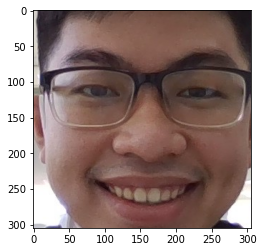

In [72]:
emotions = { 
    0: 'Angry', 
    1: 'Disgust',
    2: 'Fear', 
    3: 'Happy', 
    4: 'Sad', 
    5: 'Surprise', 
    6: 'Neutral'
} 
emotion = torch.argmax(pred).item()
print(torch.argmax(pred))
print("You are being {}".format(emotions[emotion]))
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

# Video
### 10s lấy output 1 lần
### xài counter lấy thằng lớn nhất

In [2]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

from data_loaders import Plain_Dataset, eval_data_dataloader
from deep_emotion import Deep_Emotion
from generate_data import Generate_data
import cv2
import matplotlib.pyplot as plt
from collections import Counter
import serial.tools.list_ports
from Adafruit_IO import MQTTClient
import os
import time

AIO_USERNAME = os.environ['AIO_USERNAME']
AIO_KEY = os.environ['AIO_KEY']
client = MQTTClient(AIO_USERNAME, AIO_KEY)
client.connect()
client.loop_background()


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Deep_Emotion()
net.load_state_dict(torch.load('deepEmotion.pt'))
net.to(device)

cap = cv2.VideoCapture(0)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


writer = cv2.VideoWriter('', cv2.VideoWriter_fourcc(*'XVID'),30, (width, height))
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
emotions = { 
    0: 'Angry', 
    1: 'Disgust',
    2: 'Fear', 
    3: 'Happy', 
    4: 'Sad', 
    5: 'Surprise', 
    6: 'Neutral'
} 
font = cv2.FONT_HERSHEY_SIMPLEX

face_roi = None
def predict(frame):
    # Model
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            # print("Face is not detected")
            pass
        else:
            for (ex, ey, ew, eh) in facess:
                global face_roi
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]
    
                final_image = cv2.resize(gray, (48,48))
                final_image = np.expand_dims(final_image, axis=0)
                final_image = np.expand_dims(final_image, axis=0)
                
                final_image = final_image / 255.0
                data = torch.from_numpy(final_image)
                data = data.type(torch.FloatTensor)
                data = data.cuda()
                outputs = net(data)
                pred = F.softmax(outputs, dim=1)
                emotion = torch.argmax(pred).item()
                if emotion in (0, 1, 2, 4):
                    return emotion, 0 # Negative
                else:
                    return emotion, 1 # Positive
    return 0, 1

emotionArr = Counter()
count = 0
emotionIdx = 0

while True:
    ret, frame = cap.read()
    emotion, isPositive = predict(frame)
    emotionArr[isPositive] += 1
    count += 1
    if count == 40:
        emotionIdx = emotionArr.most_common(1)[0][0]
        emotionArr = Counter()
        count = 0
        client.publish(
            'emotion',
            emotionIdx,
        )

    cv2.putText(frame, emotions[emotion], (10,450), font, 2, (0, 255, 0), 2, cv2.LINE_AA)
    writer.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

        
cap.release()
writer.release()
cv2.destroyAllWindows()

Connected to Adafruit IO!


C:\Users\ADMIN\anaconda3\envs\deepEmotion\lib\site-packages\torch\nn\functional.py:4255: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\ADMIN\anaconda3\envs\deepEmotion\lib\site-packages\torch\nn\functional.py:4193: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [2]:
import cv2
cap = cv2.VideoCapture(0)
fps = cap.get(cv2.CAP_PROP_FPS)

In [5]:
fps

30.0